In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16,10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
time = np.arange(0, 10, 0.01, dtype='float64')#arange([start,] stop[, step,], dtype=None)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))


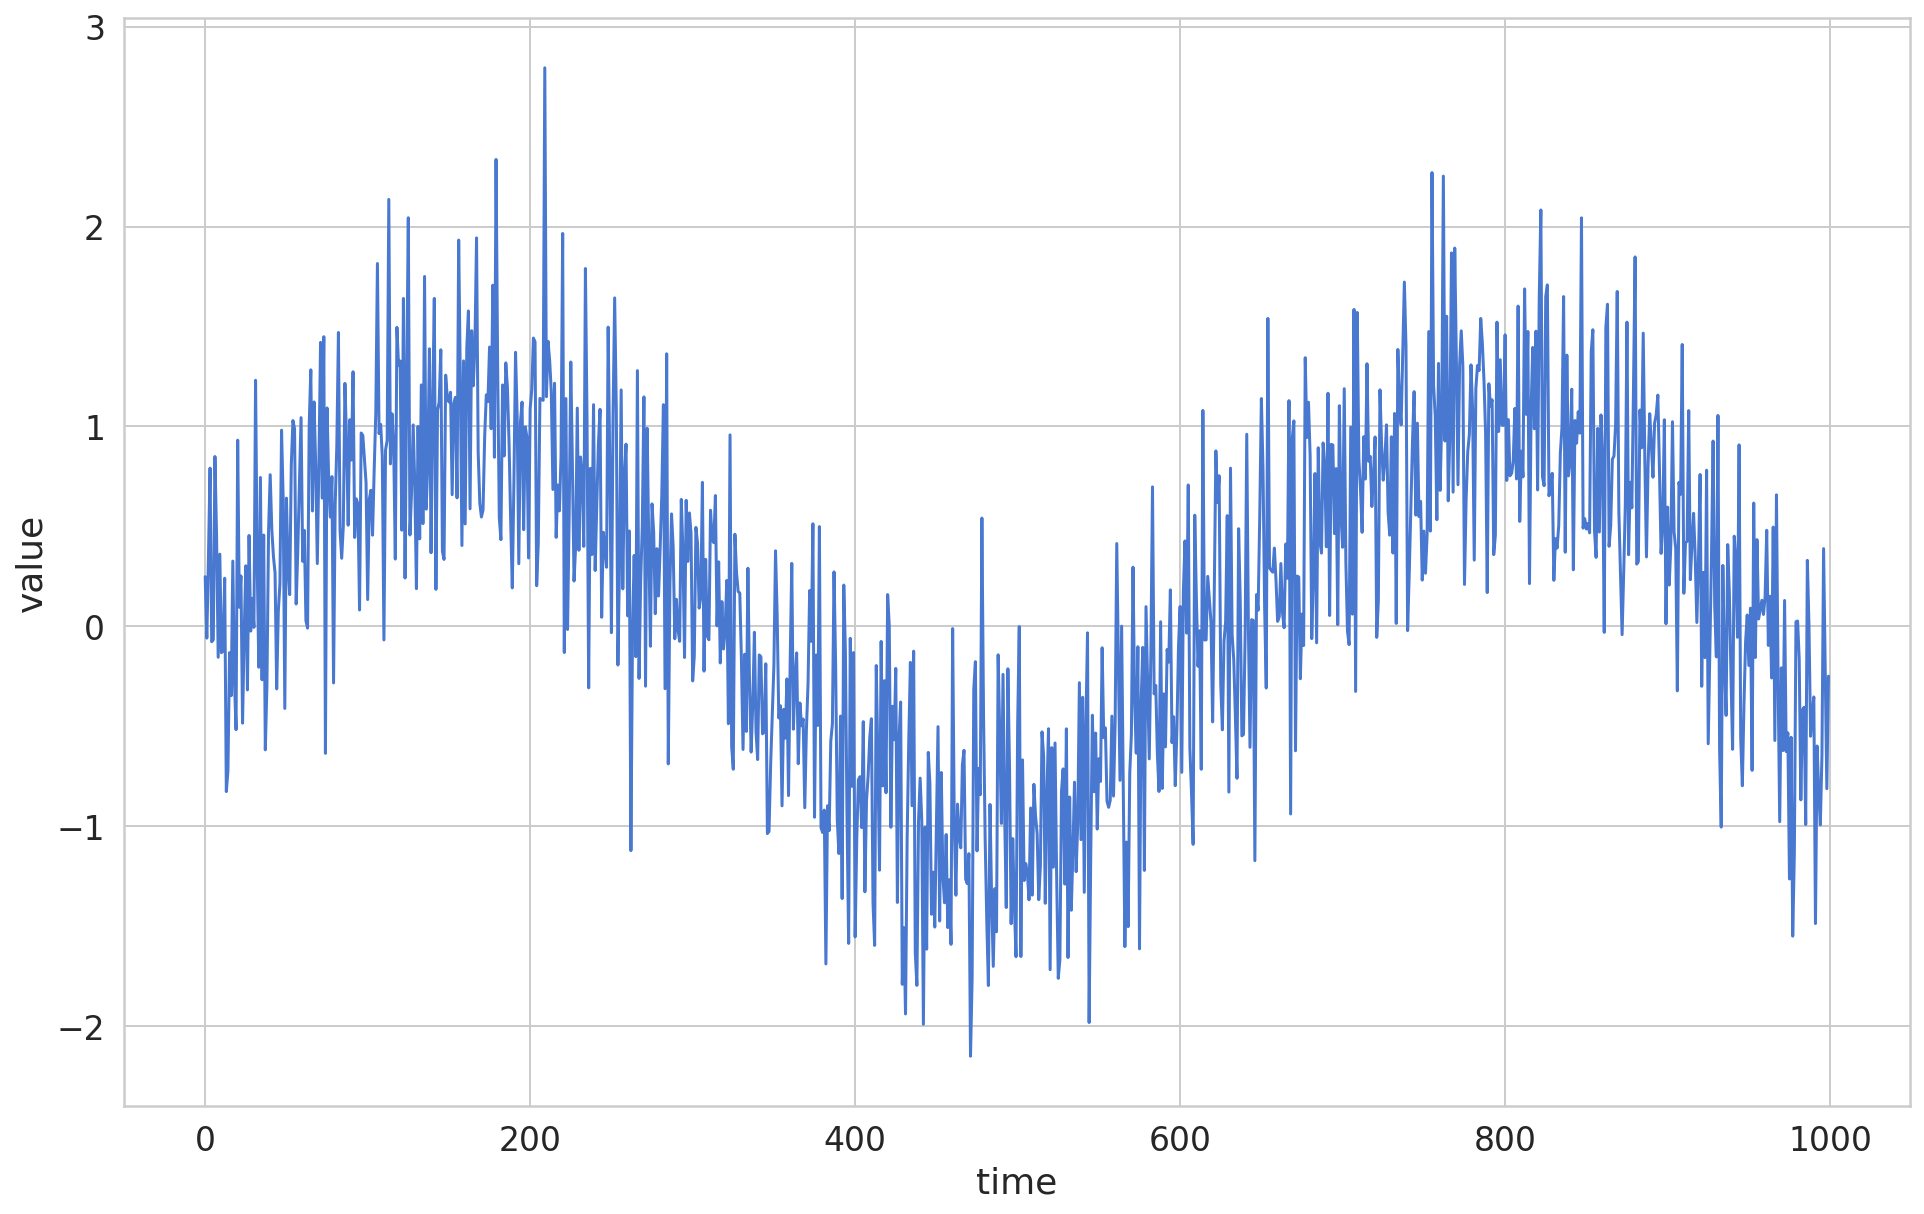

In [3]:
plt.xlabel('time')
plt.ylabel('value')
plt.plot(sin)


In [4]:
print(time.shape)
sin.shape

(1000,)


(1000,)

In [5]:
df = pd.DataFrame(sin, index=time, columns=['sine']) #인덱스값은 시간 칼럼명은 sine
train_size = int(len(df) * 0.8) # df 길이는 1000 * 0.8은 800
test_size = len(df) - train_size # 1000 - 800 = 200
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [6]:
df

,sine
0.00,0.248357
0.01,-0.059132
0.02,0.343843
0.03,0.791510
0.04,-0.077087
...,...
9.95,-0.641955
9.96,0.388811
9.97,-0.198187
9.98,-0.812721


In [7]:
print(train)
print(test)

          sine
0.00  0.248357
0.01 -0.059132
0.02  0.343843
0.03  0.791510
0.04 -0.077087
...        ...
7.95  1.521970
7.96  0.974608
7.97  1.334028
7.98  1.006229
7.99  1.005642

[800 rows x 1 columns]
          sine
8.00  1.458500
8.01  0.729831
8.02  1.034311
8.03  0.753411
8.04  0.765500
...        ...
9.95 -0.641955
9.96  0.388811
9.97 -0.198187
9.98 -0.812721
9.99 -0.249312

[200 rows x 1 columns]


In [8]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps): # 파라미터X값의 길이 - 타임스텝만큼 반복하는데
        v = X.iloc[i : (i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [9]:
time_steps = 10
# [samples, time_steps, n_features]로 모양 변경

X_train, y_train = create_dataset(train, train.sine, time_steps) 
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(790, 10, 1) (790,)
(190, 10, 1) (190,)


In [10]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=128,
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
    loss = 'mean_squared_error',
    optimizer = keras.optimizers.Adam(0.001)
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False)

Epoch 1/30
45/45 [==============================] - 2s 22ms/step - loss: 0.4745 - val_loss: 0.3055
Epoch 2/30
45/45 [==============================] - 0s 10ms/step - loss: 0.2717 - val_loss: 0.2838
Epoch 3/30
45/45 [==============================] - 0s 9ms/step - loss: 0.2671 - val_loss: 0.2697
Epoch 4/30
45/45 [==============================] - 0s 10ms/step - loss: 0.2658 - val_loss: 0.2879
Epoch 5/30
45/45 [==============================] - 0s 11ms/step - loss: 0.2655 - val_loss: 0.3063
Epoch 6/30
45/45 [==============================] - 0s 9ms/step - loss: 0.2664 - val_loss: 0.3065
Epoch 7/30
45/45 [==============================] - 0s 9ms/step - loss: 0.2664 - val_loss: 0.2985
Epoch 8/30
45/45 [==============================] - 0s 9ms/step - loss: 0.2655 - val_loss: 0.2930
Epoch 9/30
45/45 [==============================] - 0s 9ms/step - loss: 0.2647 - val_loss: 0.2897
Epoch 10/30
45/45 [==============================] - 0s 10ms/step - loss: 0.2639 - val_loss: 0.2890
Epoch 11/30
45

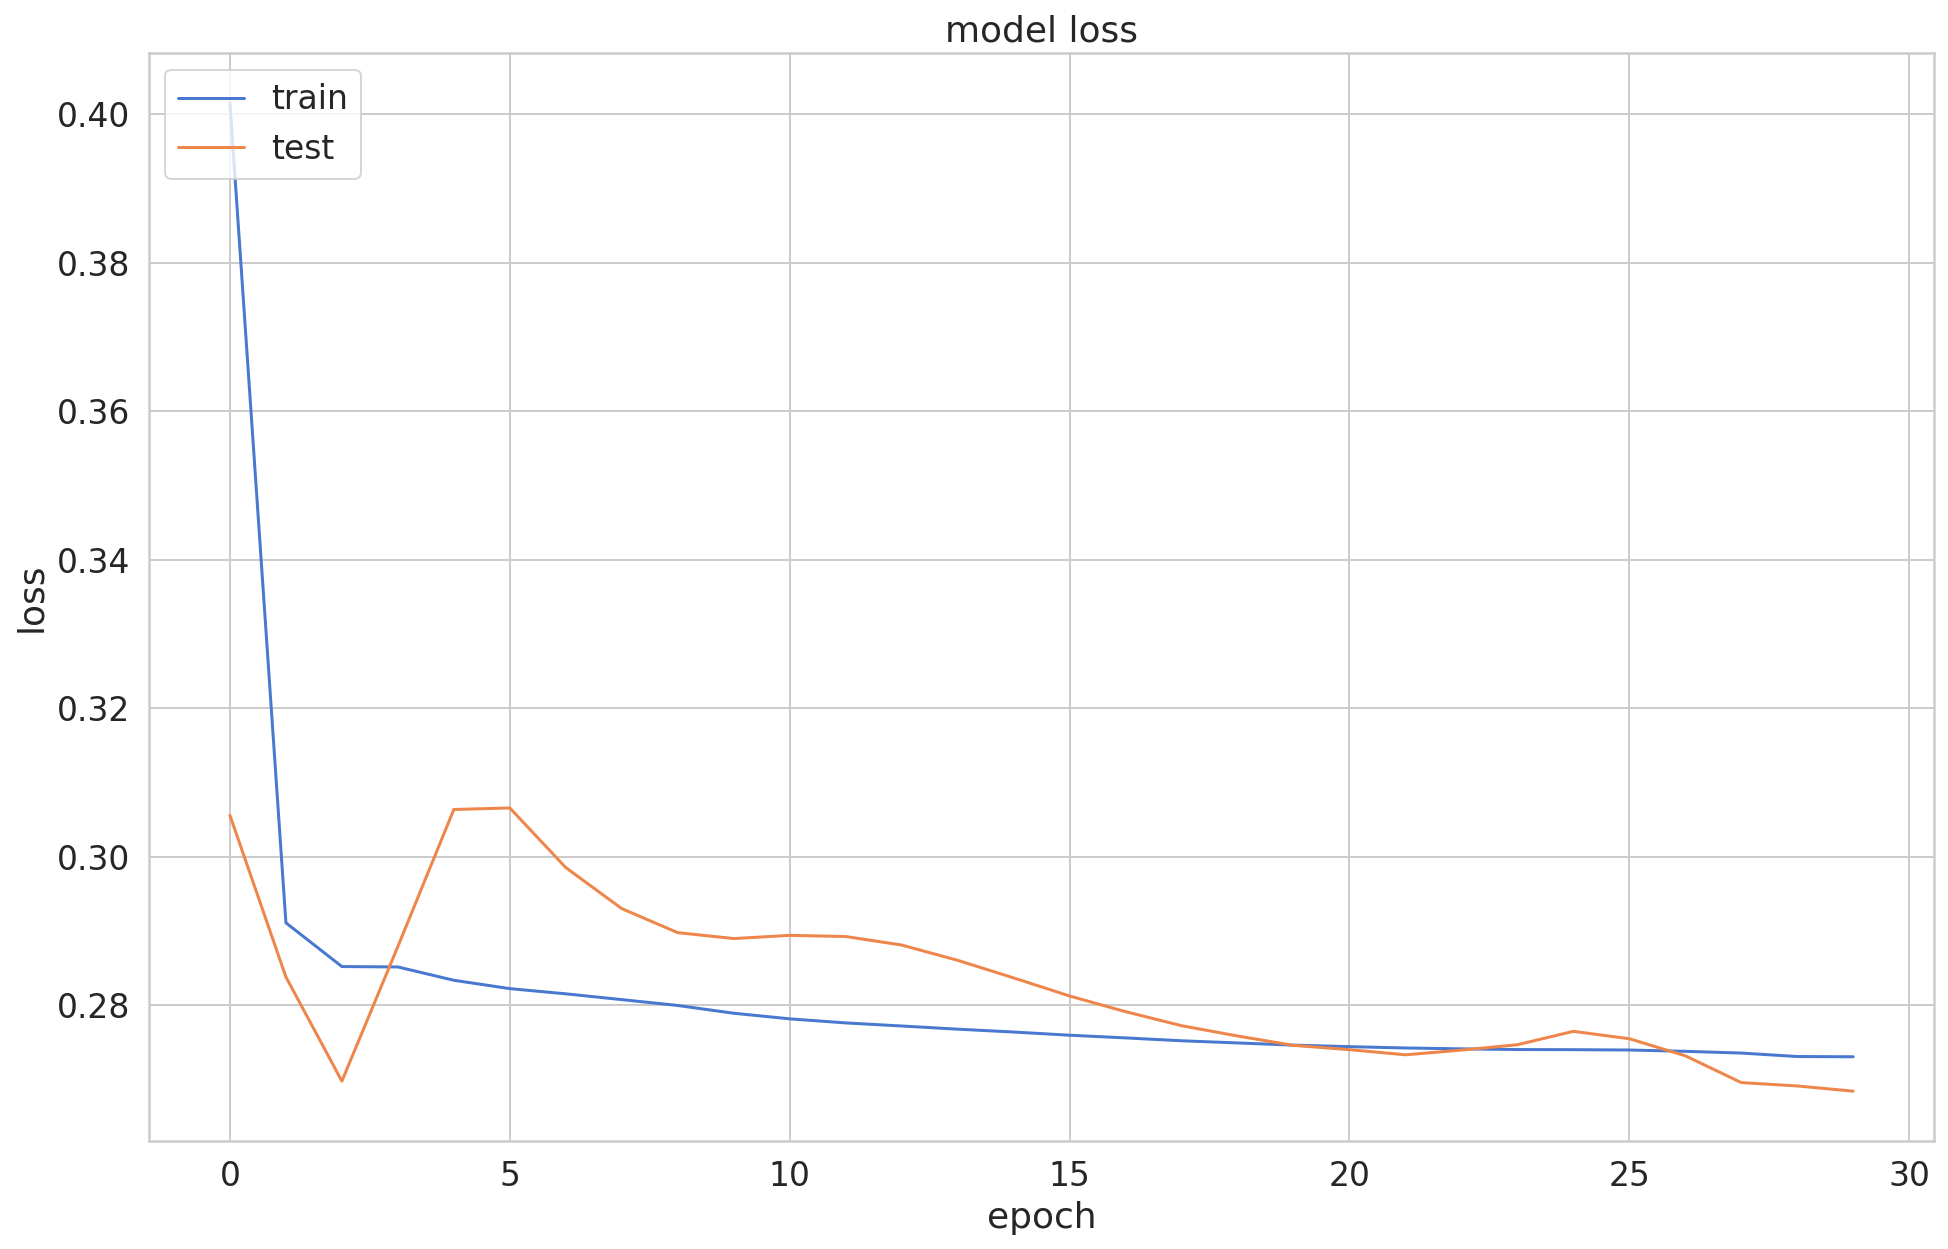

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
print(train)
print(test)

          sine
0.00  0.248357
0.01 -0.059132
0.02  0.343843
0.03  0.791510
0.04 -0.077087
...        ...
7.95  1.521970
7.96  0.974608
7.97  1.334028
7.98  1.006229
7.99  1.005642

[800 rows x 1 columns]
          sine
8.00  1.458500
8.01  0.729831
8.02  1.034311
8.03  0.753411
8.04  0.765500
...        ...
9.95 -0.641955
9.96  0.388811
9.97 -0.198187
9.98 -0.812721
9.99 -0.249312

[200 rows x 1 columns]


In [14]:
y_pred = model.predict(X_test)
print(y_pred)

[[ 0.84570163]
 [ 0.80923927]
 [ 0.8108485 ]
 [ 0.7945322 ]
 [ 0.8491941 ]
 [ 0.8643487 ]
 [ 0.91096026]
 [ 0.8598937 ]
 [ 0.8610729 ]
 [ 0.86928433]
 [ 0.87961364]
 [ 0.9183442 ]
 [ 0.892856  ]
 [ 0.8858415 ]
 [ 0.97893995]
 [ 0.9655861 ]
 [ 0.9385698 ]
 [ 0.9493141 ]
 [ 1.000212  ]
 [ 0.97798043]
 [ 0.9341461 ]
 [ 0.9081039 ]
 [ 0.8231054 ]
 [ 0.73017424]
 [ 0.68739617]
 [ 0.66695905]
 [ 0.633861  ]
 [ 0.62524766]
 [ 0.68746793]
 [ 0.69759005]
 [ 0.7436374 ]
 [ 0.7784365 ]
 [ 0.7979824 ]
 [ 0.8289915 ]
 [ 0.80503416]
 [ 0.80446565]
 [ 0.80018467]
 [ 0.7858406 ]
 [ 0.80250394]
 [ 0.87232286]
 [ 0.86375386]
 [ 0.8347971 ]
 [ 0.78617847]
 [ 0.76723677]
 [ 0.73740864]
 [ 0.76135737]
 [ 0.7916476 ]
 [ 0.76332766]
 [ 0.68982744]
 [ 0.7073135 ]
 [ 0.70924187]
 [ 0.7356953 ]
 [ 0.726558  ]
 [ 0.70627224]
 [ 0.72246957]
 [ 0.74952155]
 [ 0.75016147]
 [ 0.75150156]
 [ 0.74296147]
 [ 0.7600402 ]
 [ 0.76447487]
 [ 0.8217193 ]
 [ 0.8360906 ]
 [ 0.74734074]
 [ 0.63938344]
 [ 0.6160439 ]
 [ 0.63556

In [15]:
a = train
b = test
c = y_pred
print(a.shape)
print(b.shape)
print(c.shape)
print(type(a))
print(type(b))
c = pd.DataFrame(c)
print(type(c))


(800, 1)
(200, 1)
(190, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [16]:
b

,sine
8.00,1.458500
8.01,0.729831
8.02,1.034311
8.03,0.753411
8.04,0.765500
...,...
9.95,-0.641955
9.96,0.388811
9.97,-0.198187
9.98,-0.812721


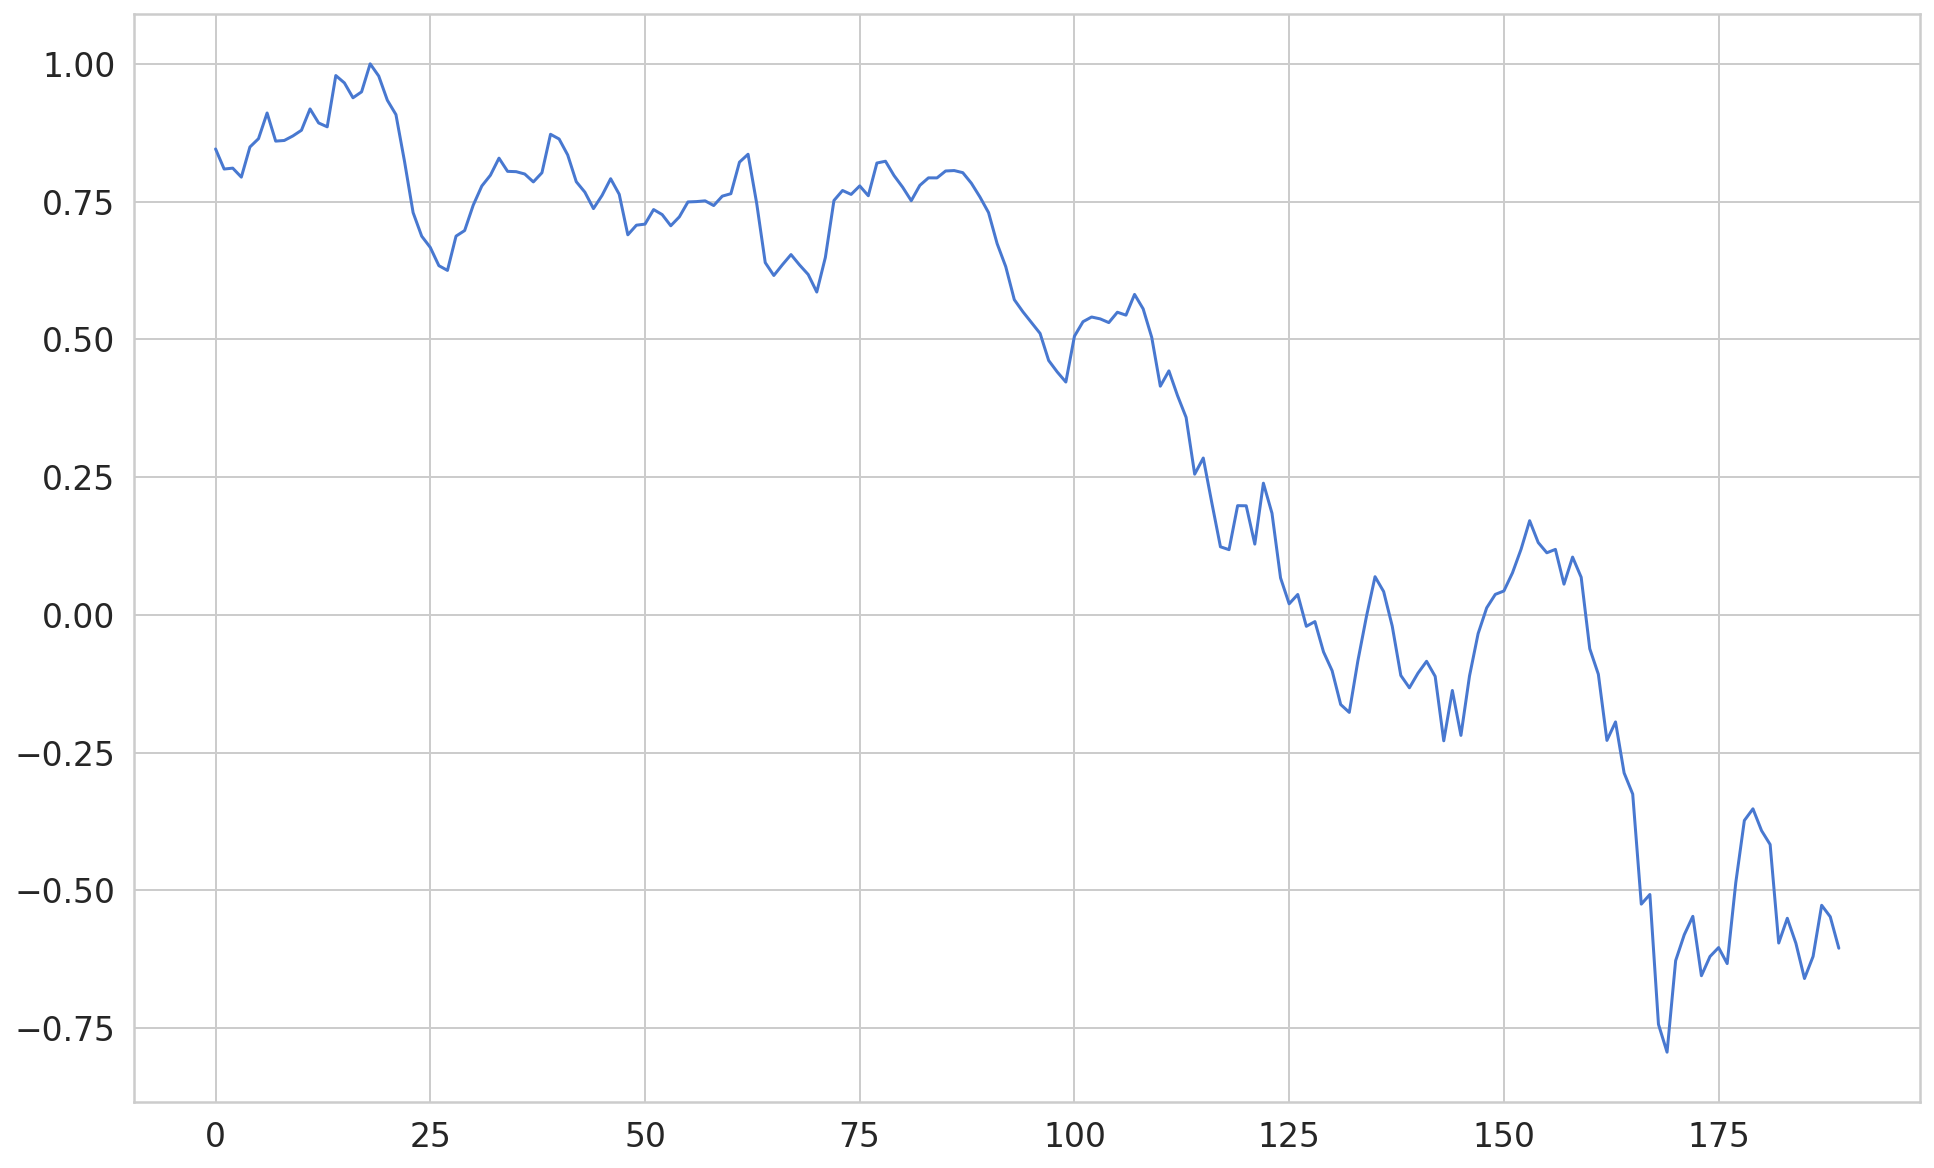

In [17]:
plt.plot(c)

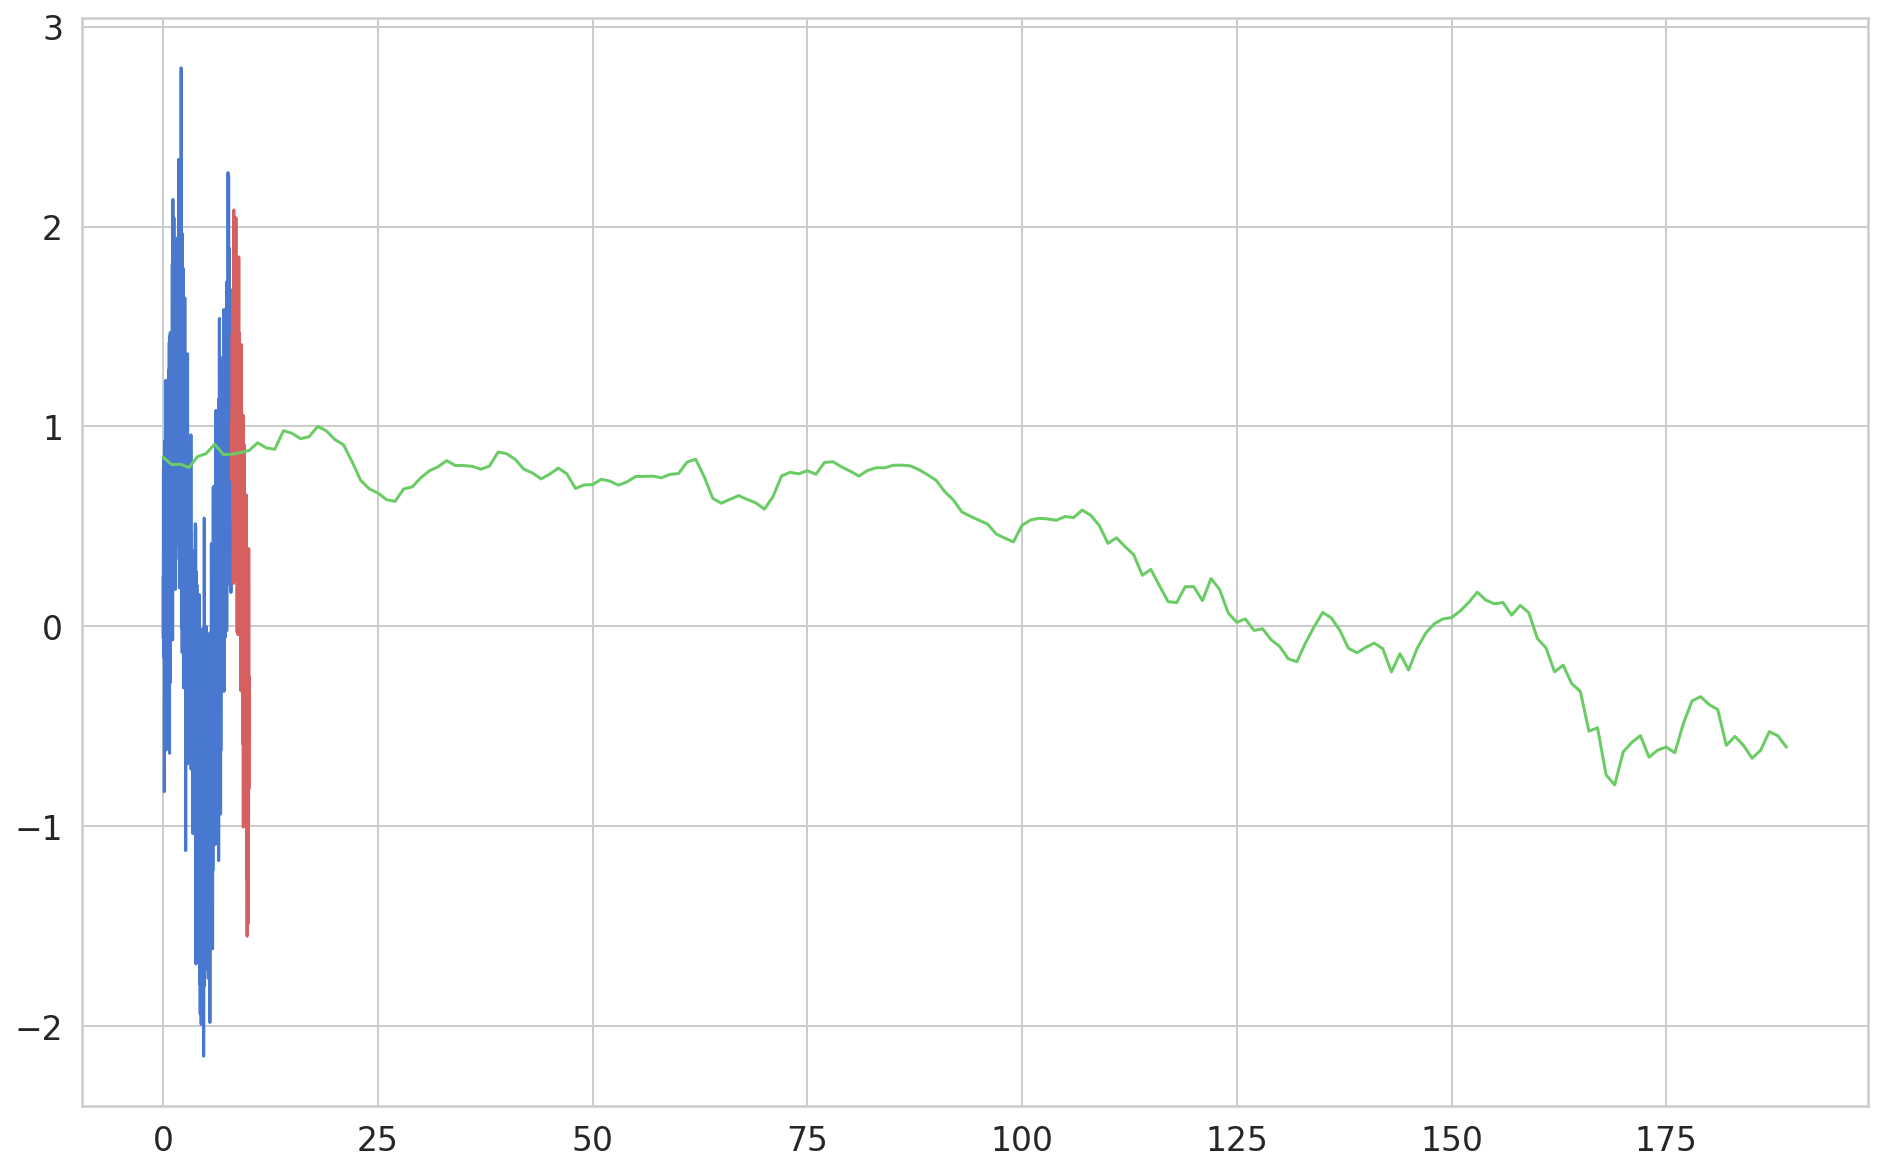

In [18]:
plt.plot(a)
plt.plot(b, 'r')
plt.plot(c ,'g')


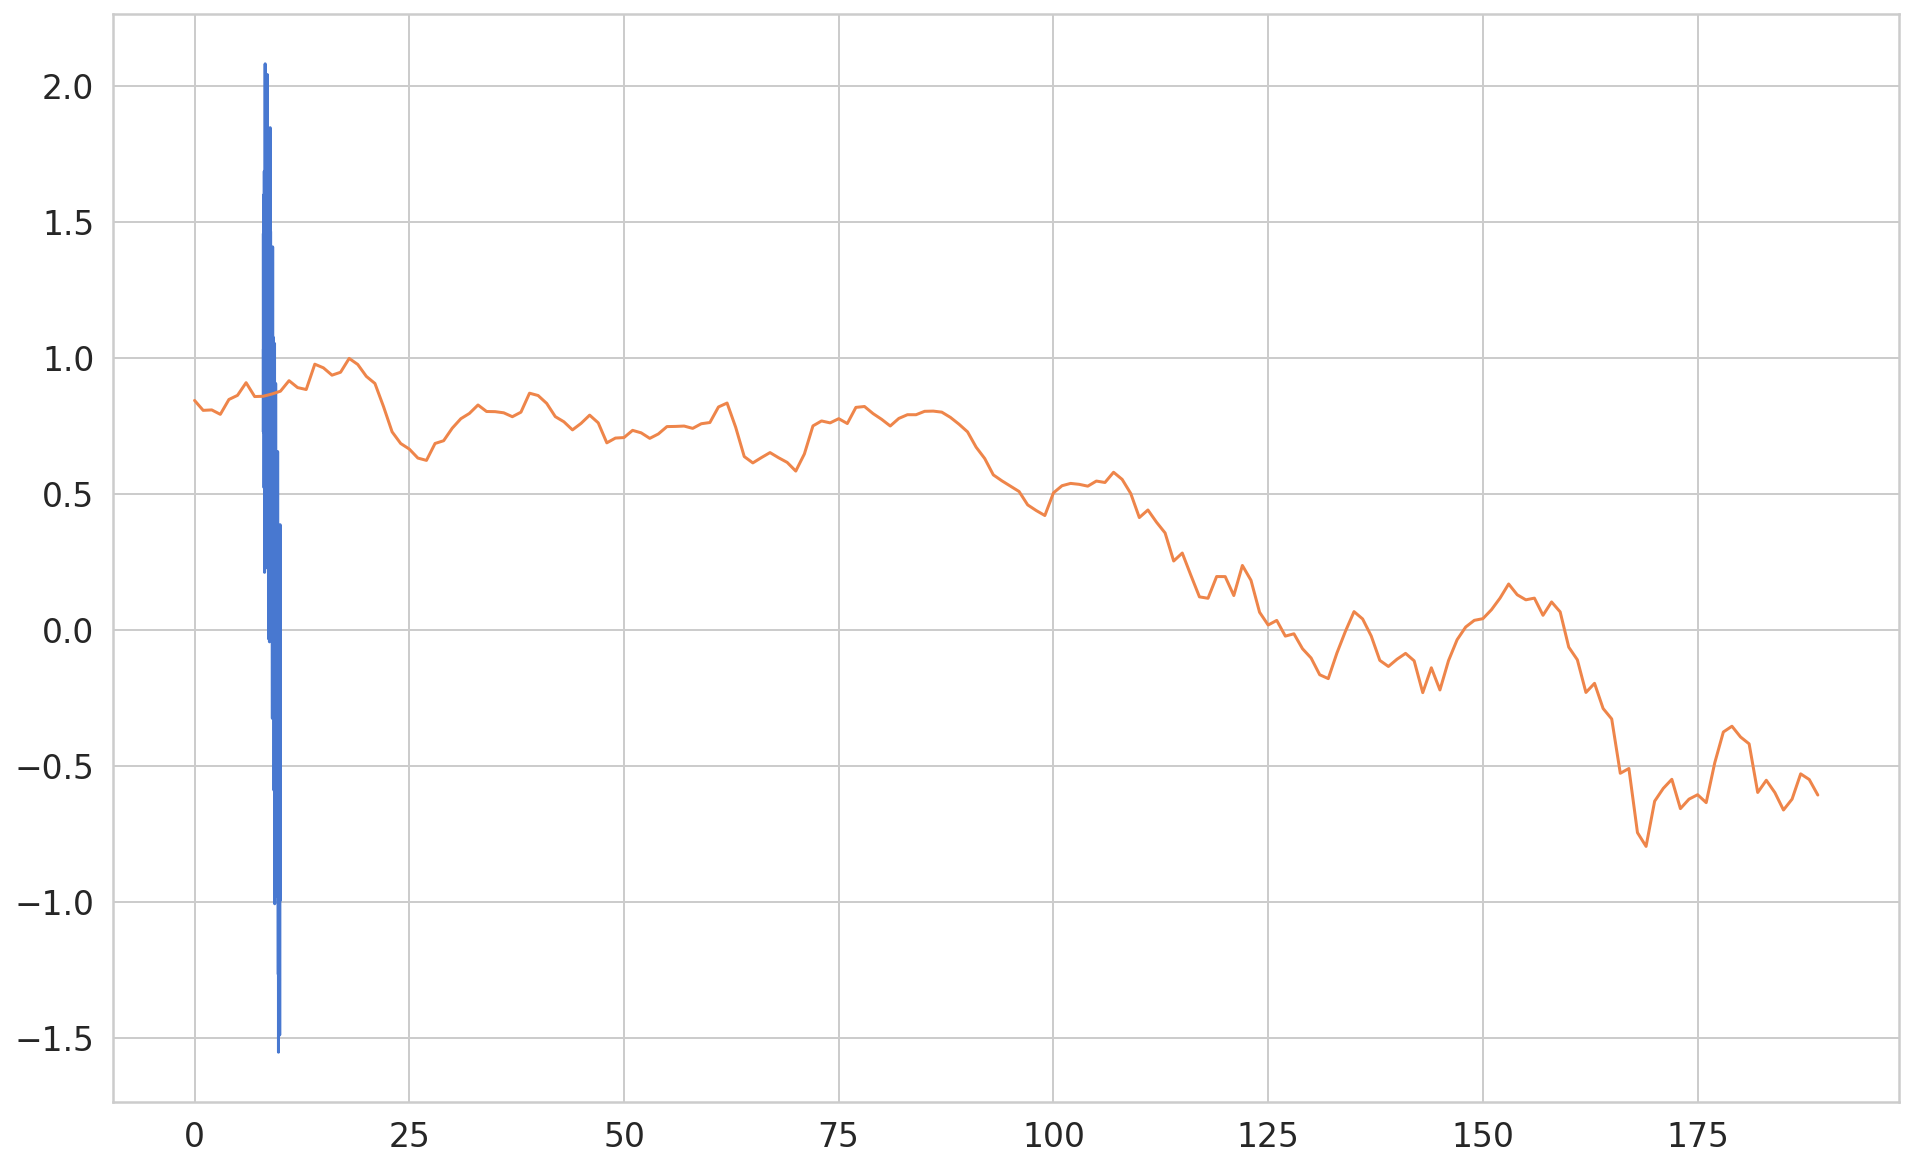

In [19]:
plt.plot(b)
plt.plot(c)

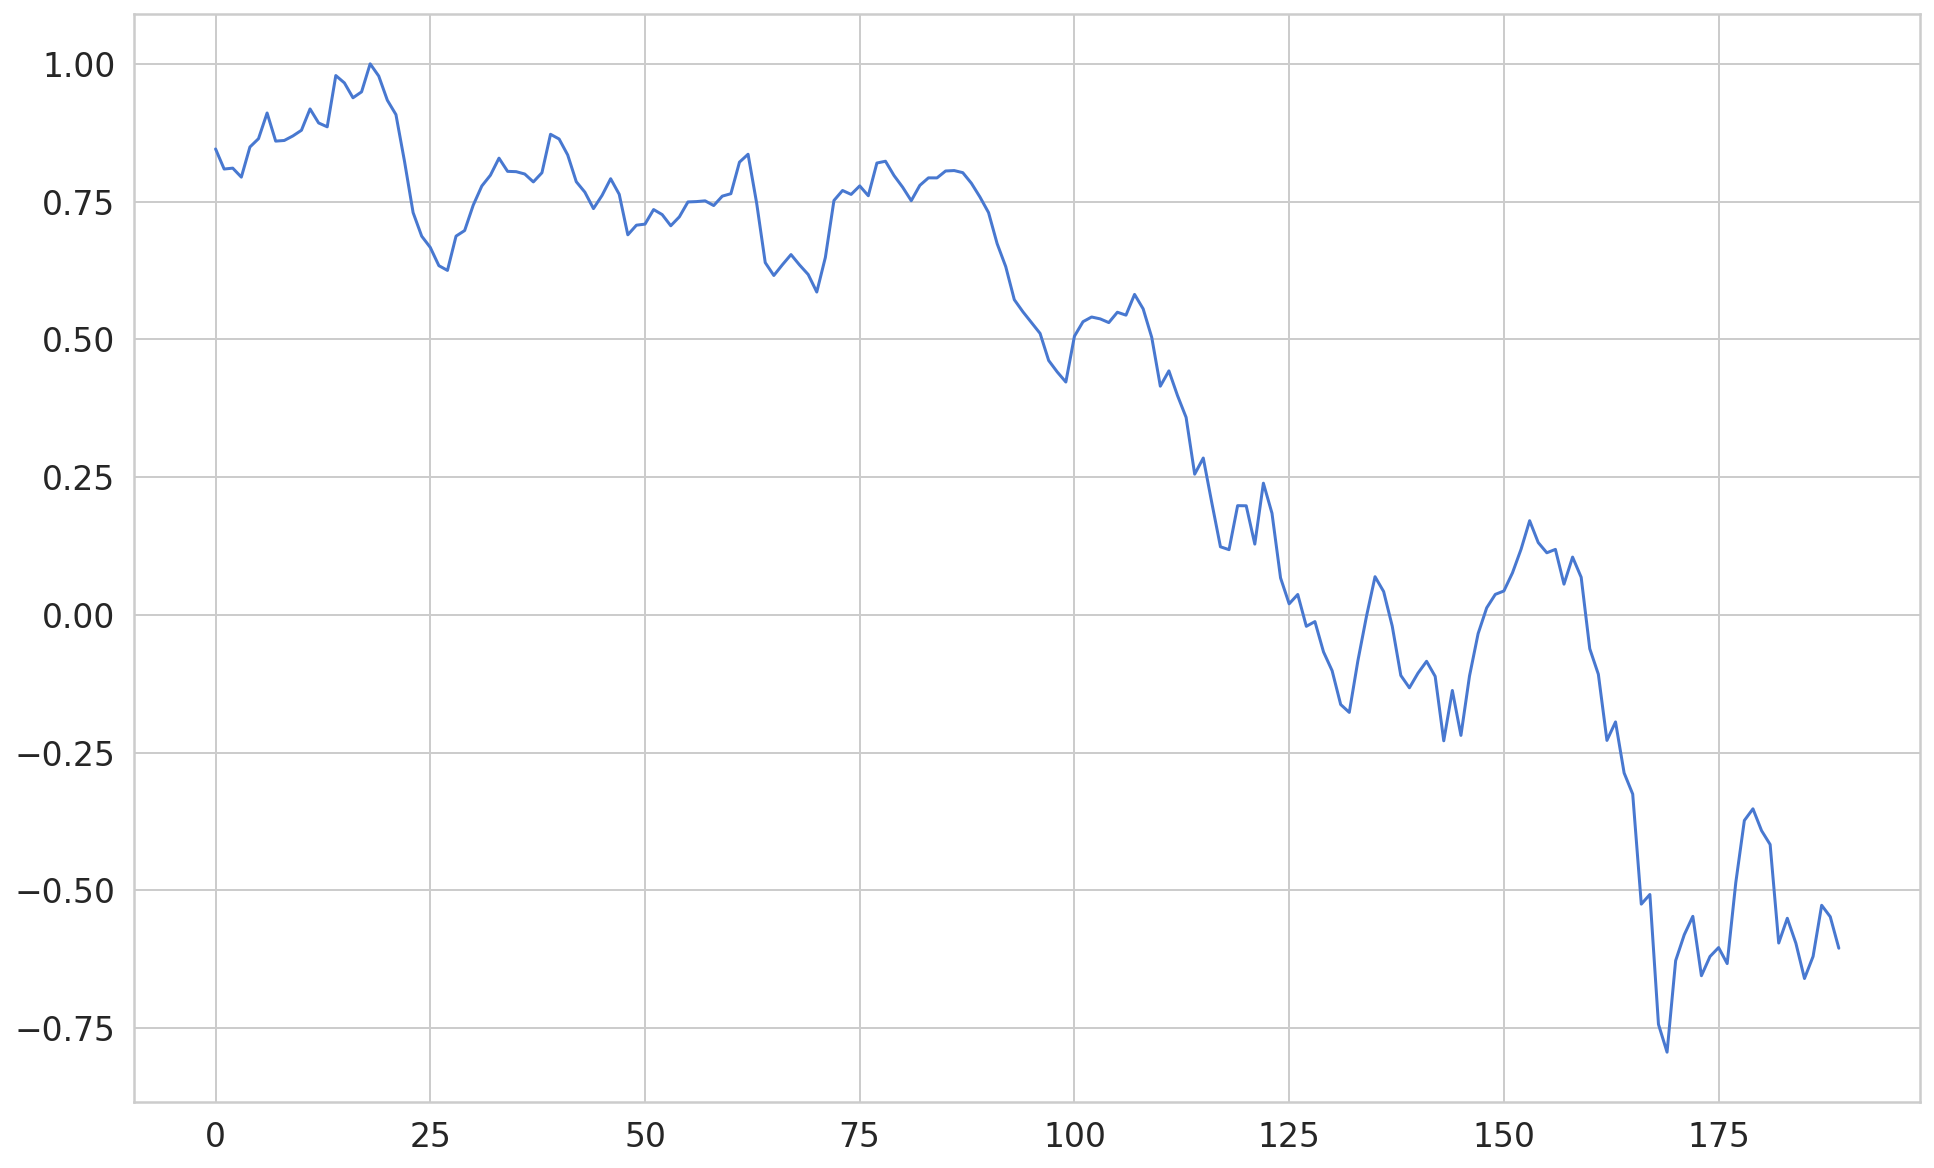

In [20]:
plt.plot(c)